In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
import numpy as np
from pandas.io.json import json_normalize
from FUNCIONES_TASAS import *

In [2]:
df=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_CSV/AL30_COMPLETE_VOLUMEN.csv")

In [3]:
AL30D_N = df[df['ticker'] == 'AL30D'].reset_index(drop=True)
GD30D_N = df[df['ticker'] == 'GD30D'].reset_index(drop=True)
AL30_N = df[df['ticker'] == 'AL30'].reset_index(drop=True)
GD30_N = df[df['ticker'] == 'GD30'].reset_index(drop=True)

In [4]:
dato_muestra=df

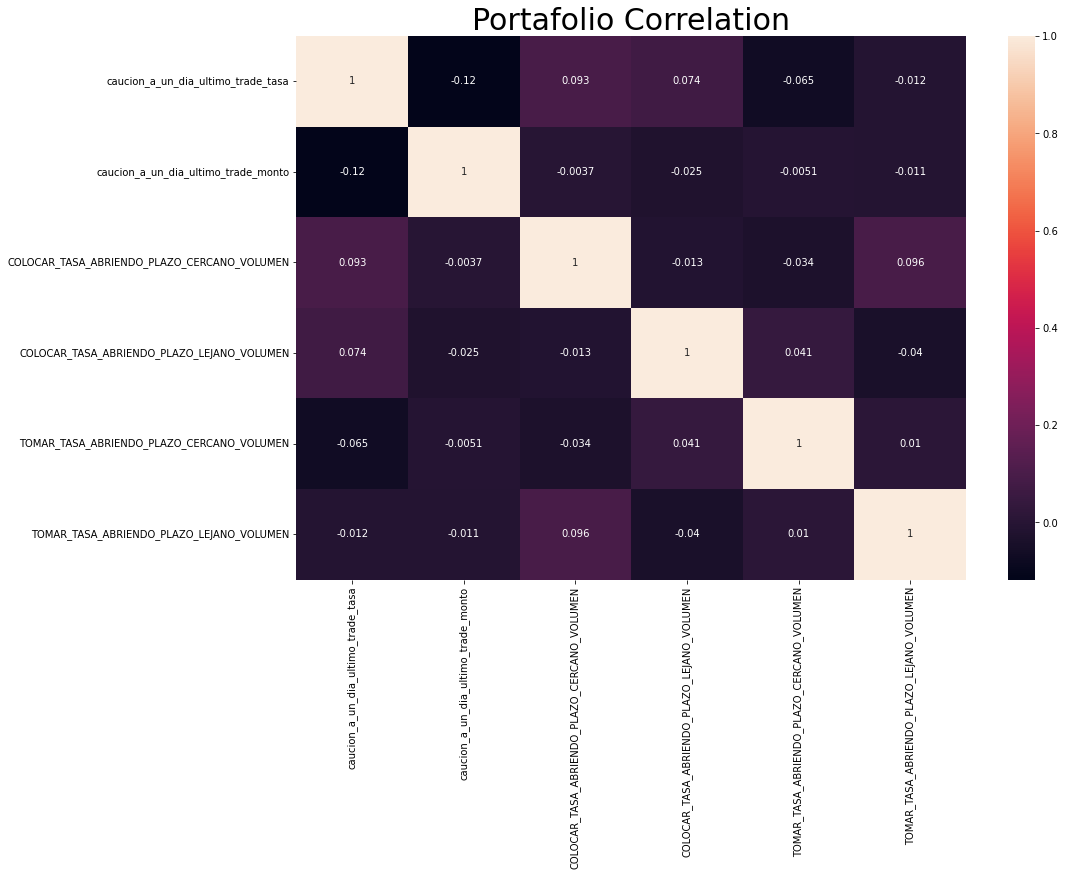

In [8]:
correlation_mat = dato_muestra.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

In [9]:
dato_muestra

,ticker,caucion_a_un_dia_ultimo_trade_tasa,caucion_a_un_dia_ultimo_trade_monto,COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN,COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN,TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN,TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN,time
0,AL30,67.25,183060.37,489226.50,1516512.30,474087.50,1.949300e+06,2023-04-19 15:02:32.504238
1,AL30,67.25,413023.04,489226.50,1516512.30,1270.75,1.851835e+06,2023-04-19 15:02:42.504503
2,AL30,67.24,573278.20,25389.00,9478823.62,1270.75,7.524461e+05,2023-04-19 15:02:52.522560
3,AL30,67.24,116231.00,25389.00,9478823.62,486795.00,1.197086e+07,2023-04-19 15:03:02.527854
4,AL30,67.24,63789.38,25389.00,9478823.62,488750.00,1.040793e+07,2023-04-19 15:03:12.557203
...,...,...,...,...,...,...,...,...
5605,AL30,69.00,200000.00,3276746.78,4662250.00,111890.68,4.993447e+04,2023-04-21 20:00:47.752672
5606,AL30,69.00,200000.00,2764201.78,4662250.00,111890.68,4.993447e+04,2023-04-21 20:01:20.689192
5607,AL30,69.00,200000.00,2764201.78,4662250.00,111890.68,4.993447e+04,2023-04-21 20:02:58.460419
5608,AL30,69.00,200000.00,2764201.78,4662250.00,111890.68,4.993447e+04,2023-04-21 20:04:34.512685


Text(0.5, 1.0, 'Tomar Volumen Abriendo Cercano vs Tomar Volumen Abriendo Lejano')

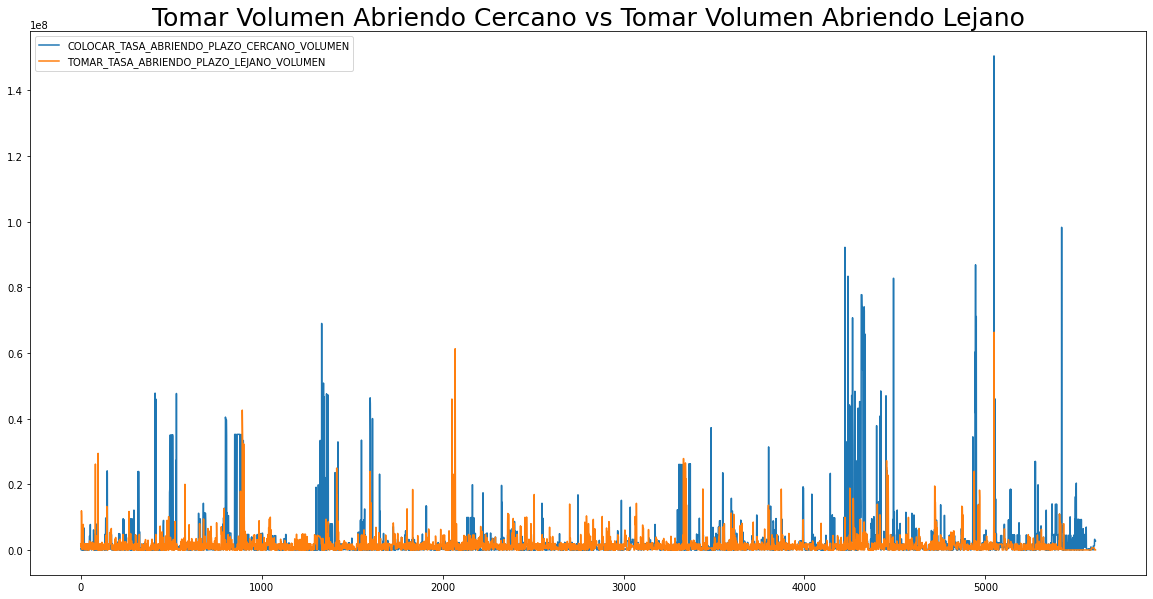

In [10]:
dato_muestra[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"]].plot(figsize=(20,10))
plt.title("Tomar Volumen Abriendo Cercano vs Tomar Volumen Abriendo Lejano", fontsize=25)

Text(0.5, 1.0, 'Tomar Volumen Abriendo Cercano vs Tomar Volumen Abriendo Lejano')

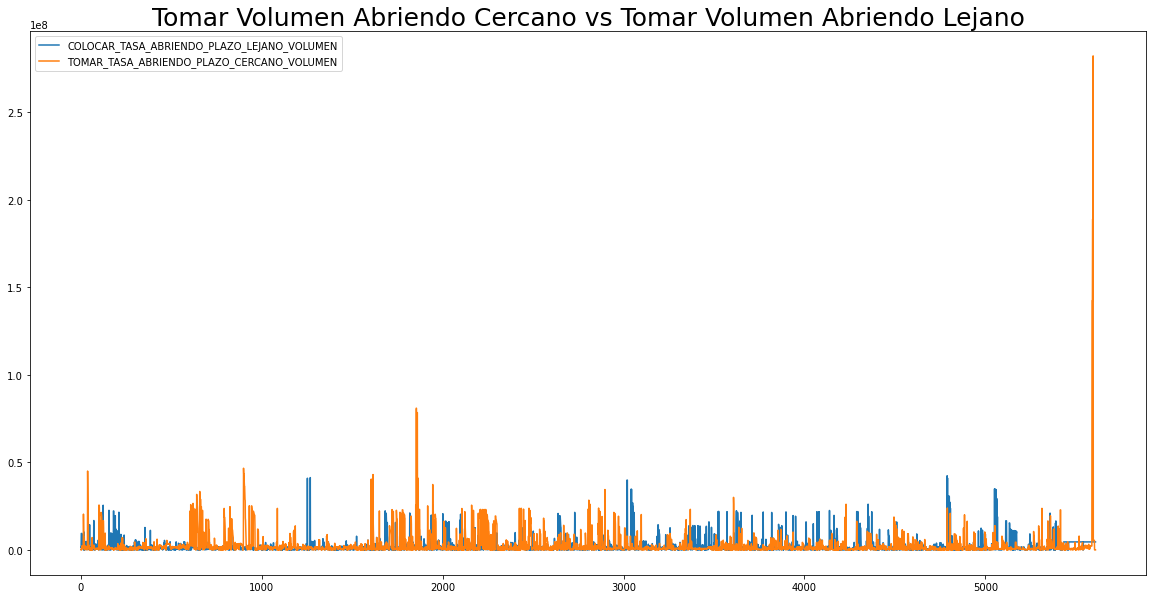

In [11]:
dato_muestra[["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN","TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"]].plot(figsize=(20,10))
plt.title("Tomar Volumen Abriendo Cercano vs Tomar Volumen Abriendo Lejano", fontsize=25)

# ANALISIS DE DISTRIBUCION DE VOLUMEN

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


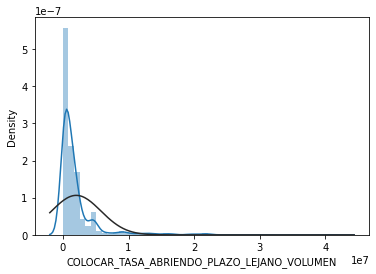

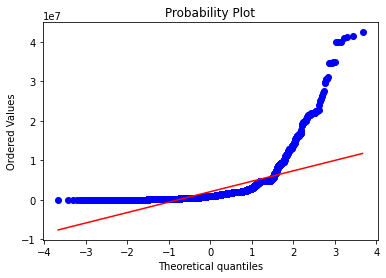

In [12]:
sns.distplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


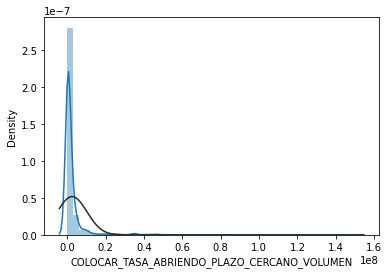

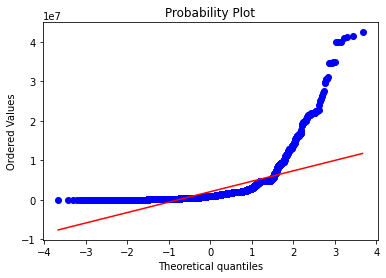

In [13]:
sns.distplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


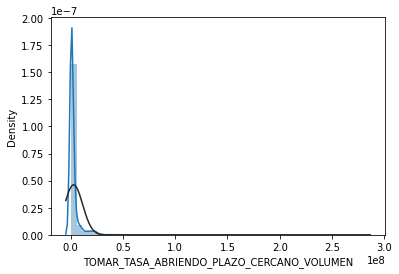

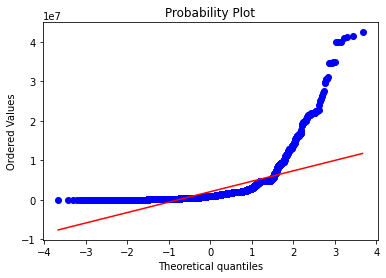

In [14]:
sns.distplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


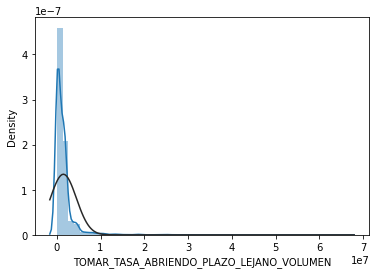

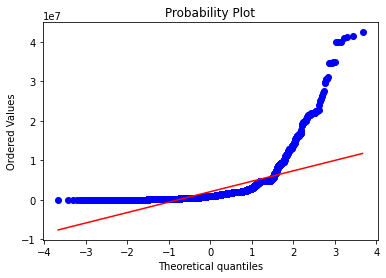

In [15]:
sns.distplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], plot=plt)

# ESTADISTICAS EN GENERAL

In [16]:
np.var(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"])

8804162782274.85

In [17]:
dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].min()

91.835

In [18]:
dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].max()

66356699.4

In [19]:
dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].mean()

1516259.6992263913

In [20]:
dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].median()

829108.3625

# ANALISIS DE DISTRIBUCION DE CAMBIO PORCENTUAL VOLUMEN

In [21]:
dato_muestra["PCT_CHANGE_TOMAR_LEJANO_VOLUMEN"]=dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].pct_change()
dato_muestra["PCT_CHANGE_TOMAR_CERCANO_VOLUMEN"]=dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"].pct_change()
dato_muestra["PCT_CHANGE_COLOCAR_LEJANO_VOLUMEN"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].pct_change()
dato_muestra["PCT_CHANGE_COLOCAR_CERCANO_VOLUMEN"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"].pct_change()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


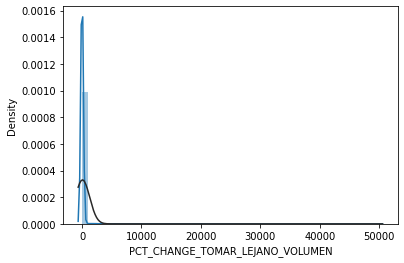

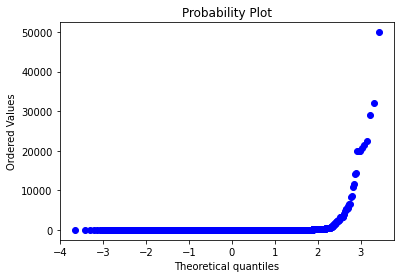

In [22]:
sns.distplot(dato_muestra["PCT_CHANGE_TOMAR_LEJANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["PCT_CHANGE_TOMAR_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


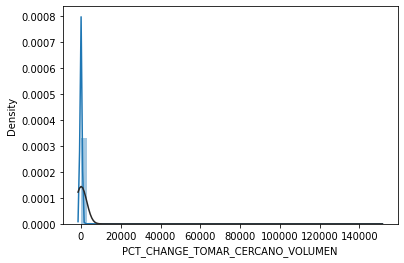

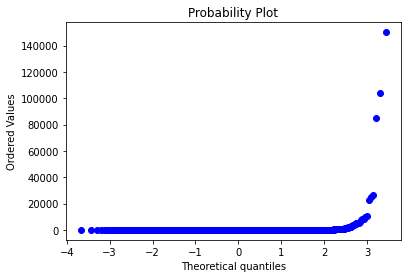

In [23]:
sns.distplot(dato_muestra["PCT_CHANGE_TOMAR_CERCANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["PCT_CHANGE_TOMAR_CERCANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


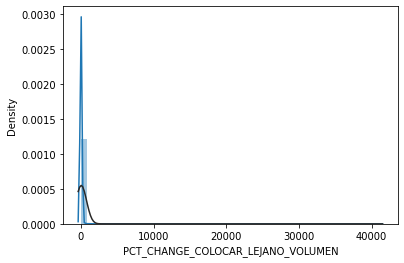

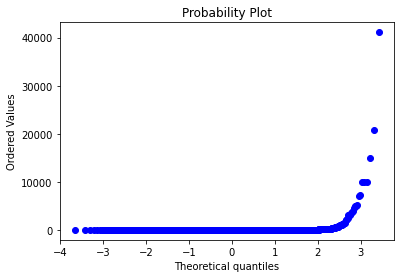

In [24]:
sns.distplot(dato_muestra["PCT_CHANGE_COLOCAR_LEJANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["PCT_CHANGE_COLOCAR_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


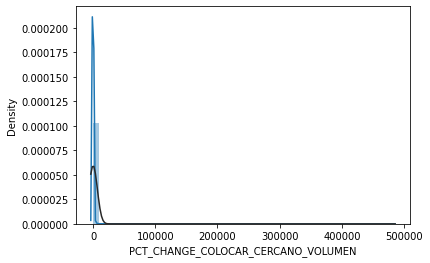

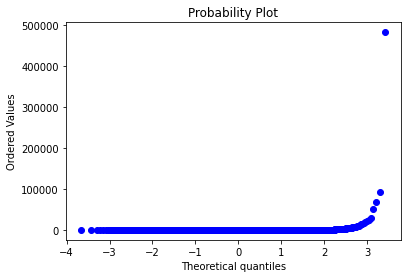

In [25]:
sns.distplot(dato_muestra["PCT_CHANGE_COLOCAR_CERCANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["PCT_CHANGE_COLOCAR_CERCANO_VOLUMEN"], plot=plt)